In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import stats

In [2]:
# Specify the path of the files
gainPath = '/home/marteswong/CCD/CCD gain 3c(1)/CCD gain 3c(1)/'
gain_bias = '/home/marteswong/CCD/CCD gain 3c/'+'bias_0_230915-161133.dat'

In [3]:
# Compute the mean and variance of the bias frame

data_df = pd.read_csv(gain_bias, delimiter=' ')
bias_array = np.array(data_df)[430:530, 590:690]
print(bias_array)
C_b = np.mean(bias_array)
var_b = np.std(bias_array) **2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
# Examine the dark count
data_df = pd.read_csv(gainPath + '0/dark_0.dat', delimiter=' ')
dark_array = np.array(data_df)[430:530, 590:690]

dark_dec = np.zeros(dark_array.shape)

for i in range(len(dark_array)):
    for j in range(len(dark_array[i])-1):
        t = dark_array[i][j]
        d = int(str(t), base=16)
        dark_dec[i][j] = d

# Select a pixel which has no dark current and good enough to be the target pixel in the next part
pix_coord = (49,50)

print(dark_dec[45:55,45:55])
print(dark_dec[pix_coord])   # [47,48], [46,48]
# C_b = np.mean(bias_array)
# var_b = np.std(bias_array) **2

[[ 0.  0.  1.  0.  0.  6.  0.  0.  0.  3.]
 [ 0. 12.  0.  0.  0. 46.  6.  5.  3.  3.]
 [ 0.  0.  0.  0.  0.  0. 11.  6.  0.  8.]
 [16. 17.  0.  0.  0.  5.  0.  0. 24.  0.]
 [ 0.  0.  0.  0.  6.  2.  6.  0.  2.  0.]
 [15.  7.  0.  0. 12.  6.  0. 44. 10.  4.]
 [ 0.  2.  0.  0. 84.  0.  0. 21.  0. 23.]
 [ 0. 66.  0.  3.  0.  6.  0. 21.  0.  0.]
 [ 0. 30.  0.  0.  7.  0.  0.  0.  0.  5.]
 [ 0.  2.  0.  3.  0.  0.  0.  0.  1.  0.]]
2.0


In [18]:
# Compute the mean signal of ROI from the bias-subtracted images
paper = np.arange(1,10)
mean = []
var = []
data_dec_a = np.zeros((100,100))
data_dec_i = np.zeros((100,100))
pix = np.zeros(100)
count = 0


for n in paper:
    # Define Path for different no. of papers
    addPath = "{}/".format(n)

    # Set the first frame obtained as frame A
    data_df_a = pd.read_csv(gainPath + addPath + "{}_0.dat".format(n), delimiter=' ')
    data_array_a = np.array(data_df_a)[430:530, 590:690]

    # Convert all elements within ROI in frame A from hex to dec
    for i in range(len(data_array_a)):
        for j in range(len(data_array_a[i])):
            t_a = data_array_a[i][j]
            d_a = int(str(t_a), base=16)
            data_dec_a[i][j] = d_a

    # Store the value of the selected pixel in first frame
    pix[0] = data_dec_a[pix_coord]

    # Subtract bias frame from frame A
    net_data_dec_a = np.subtract(data_dec_a, bias_array)

    # Comparing the remaining 99 frames to frame A(the first frame)
    for frame in range(1,100):
        # Read-in data of a frame
        data_df_i = pd.read_csv(gainPath + addPath + "{}_{}.dat".format(n, frame), delimiter=' ')
        # Select the ROI
        data_array_i = np.array(data_df_i)[430:530, 590:690]

        # Convert all elements within ROI in the frame from hex to dec
        for i in range(len(data_array_i)):
            for j in range(len(data_array_i[i])):
                t_i = data_array_i[i][j]
                d_i = int(str(t_i), base=16)
                data_dec_i[i][j] = d_i
    
        # Subtract bias frame from frame i
        net_data_dec_i = np.subtract(data_dec_i, bias_array)
        # Compute the ratio between frame A and the current frame i
        ratio = np.mean(net_data_dec_a) / np.mean(net_data_dec_i)


        # Select a pixel
        # From Dark_trial, ROI[47, 48] has no dark current, so it is chosen
        pix[frame] = data_dec_i[pix_coord] * ratio

    # Compute the mean value and the variance of 100 images at the same intensity level for the same pixel
    mean.append(np.mean(pix))
    var.append(np.std(pix)**2)

    count += 1

/tmp/ipykernel_203/1643747812.py:35: DtypeWarning: Columns (1267) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df_i = pd.read_csv(gainPath + addPath + "{}_{}.dat".format(n, frame), delimiter=' ')
/tmp/ipykernel_203/1643747812.py:35: DtypeWarning: Columns (1265) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df_i = pd.read_csv(gainPath + addPath + "{}_{}.dat".format(n, frame), delimiter=' ')
/tmp/ipykernel_203/1643747812.py:35: DtypeWarning: Columns (1262) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df_i = pd.read_csv(gainPath + addPath + "{}_{}.dat".format(n, frame), delimiter=' ')
/tmp/ipykernel_203/1643747812.py:35: DtypeWarning: Columns (1251) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df_i = pd.read_csv(gainPath + addPath + "{}_{}.dat".format(n, frame), delimiter=' ')
/tmp/ipykernel_203/1643747812.py:35: DtypeWarning: Columns (1222) have m

In [19]:
print(mean)
print(var)

[227.55522057388308, 101.03895814179073, 78.94843676053495, 79.07159198799134, 79.62245612311678, 82.37505715485858, 85.08280447260704, 91.02952006474271, 97.98168485453888]
[5.51702325272218, 2.8247878806072357, 2.8508558854379875, 2.6229283472501197, 2.5213394005921024, 2.289002841369726, 3.200868752142678, 2.8722030852019085, 3.1021685475020013]


In [20]:
slope, intercept, r_value, p_value, std_err = stats.linregress(var[1:], mean[1:])
res = stats.linregress(var[1:], mean[1:])

x = [var[-1], var[1]]
y = [x[0]*slope+intercept, x[1]*slope + intercept]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


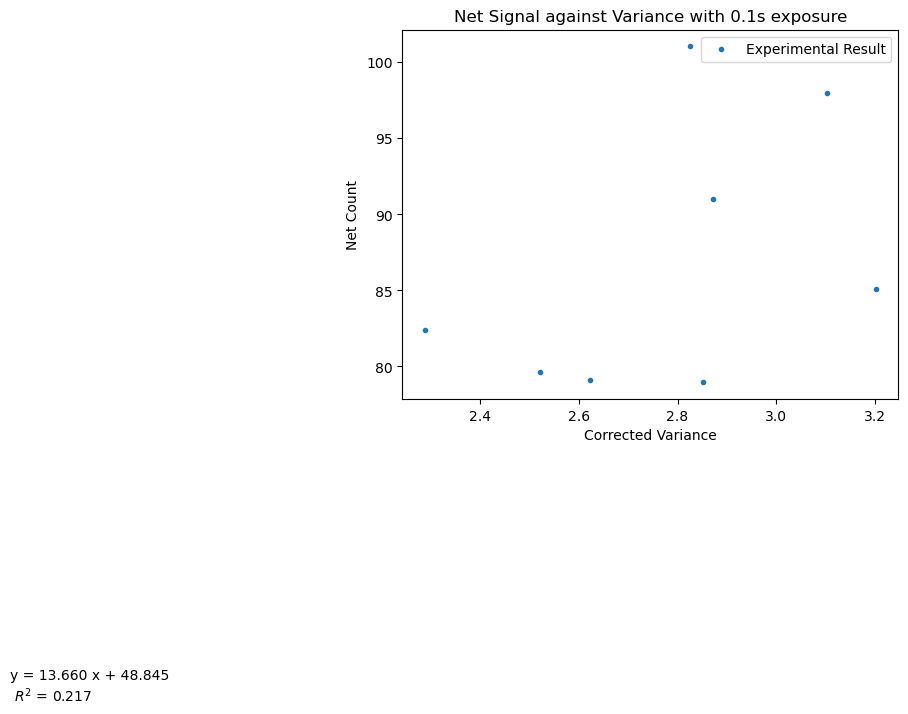

In [22]:
# Overplot the experimental data with the fitted line
# Display the equation obtained from linear regression on the plot
# plt.plot(var, mean, marker = ".", label = "Experimental Result")
plt.scatter(var[1:], mean[1:], marker = ".", label = "Experimental Result")
# plt.plot(x, y, label = 'Fitted line')
plt.title("Net Signal against Variance with 0.1s exposure")
plt.xlabel("Corrected Variance")
plt.ylabel("Net Count")
plt.legend()

plt.text(1.45,58,"y = {:.3f} x + {:.3f}\n $R^2$ = {:.3f}".format(slope, intercept, r_value**2))
plt.savefig(gainPath + "exp3c.eps")

In [27]:
print(var[2])

1.3016637318512323
